## Tratamento dos dados

#### Importação das bibliotecas

In [1]:
import pandas as pd
import os

#### Ligas disponíveis

O dataset de transferências possui os dados das seguintes ligas:

#### Problemas:

- Sub21 e Sub18
- Incoerência entre as colunas club_name e club_involved_name

In [6]:
os.listdir(DATA_DIR + '/' + '2014')

['dutch_eredivisie.csv',
 'english_championship.csv',
 'english_premier_league.csv',
 'french_ligue_1.csv',
 'german_bundesliga_1.csv',
 'italian_serie_a.csv',
 'portugese_liga_nos.csv',
 'russian_premier_liga.csv',
 'spanish_primera_division.csv']

#### Loading Data

Função para carregar o dataset. Recebe o diretório que o data está salvo e o ano.

In [3]:
def loading_data(DATA_DIR, year):
    
    # Leitura do primeiro dataset para carregar as columns
    dir = "./data/transfers_master/data/"+ year + "/dutch_eredivisie.csv"
    data = pd.read_csv(dir)

    # Loop desconsidera o primeiro elemento (carregado no código acima)
    for league in os.listdir(DATA_DIR + '/' + year)[1:]:
            string = (DATA_DIR + '/' + year + '/' + league)
            data_temp = pd.read_csv(string)
            
            # Concatenação dos dados
            data = pd.concat([data, data_temp])
     
    return(data)

def concat_year(start, end, DATA_DIR, data):
    
    for year in range(start, end+1):
        data = pd.concat([data, loading_data(DATA_DIR, str(year))])
        
    return data

In [7]:
DATA_DIR = './data/transfers_master/data'
YEAR = '1992'

data = loading_data(DATA_DIR, YEAR)
data

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season
0,Fortuna Sittard,René Hofman,31.0,Right Winger,Roda JC,?,in,Summer,NaN,Eredivisie,1992,1992/1993
1,Fortuna Sittard,Peter Schmitz,21.0,Forward,Helmond Sport,?,in,Summer,NaN,Eredivisie,1992,1992/1993
2,Fortuna Sittard,Kenneth Nysaether,22.0,Centre-Forward,Lillestrøm SK,?,in,Summer,NaN,Eredivisie,1992,1992/1993
3,Fortuna Sittard,Arno van Zwam,22.0,Goalkeeper,Fortuna U19,-,in,Summer,0.0,Eredivisie,1992,1992/1993
4,Fortuna Sittard,Jerry Taihuttu,22.0,Centre-Forward,Helmond Sport,Loan,out,Summer,0.0,Eredivisie,1992,1992/1993
...,...,...,...,...,...,...,...,...,...,...,...,...
190,Sevilla FC,Miguelo,23.0,Midfielder,Real Murcia,?,out,Winter,NaN,Primera Division,1992,1992/1993
191,Rayo Vallecano,Juan Ramón Comas,30.0,Forward,Atl. Marbella,?,out,Winter,NaN,Primera Division,1992,1992/1993
192,CD Logroñés (liq.),Víctor Torres Mestre,22.0,Left-Back,Real Madrid B,?,in,Winter,NaN,Primera Division,1992,1992/1993
193,Real Zaragoza,Dorin Mateut,27.0,Attacking Midfield,Brescia,?,out,Winter,NaN,Primera Division,1992,1992/1993


In [8]:
data = concat_year(1993, 2015, DATA_DIR, data)

In [9]:
data_in = data.loc[data["transfer_movement"] == "in"]
data_out = data.loc[data["transfer_movement"] == "out"]
data_in = data_in.reset_index()
data_out = data_out.reset_index()

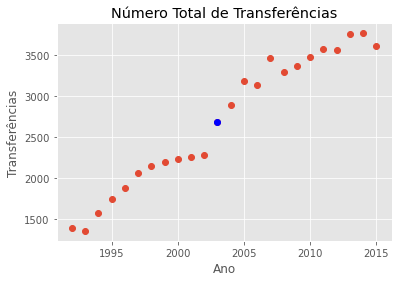

In [53]:
import matplotlib.pyplot as plt

pre_gal = pl.sort_index()
pos_gal = pl.sort_index()
pre_gal = pre_gal[:11]
pos_gal = pos_gal[11:]

plt.style.use('ggplot')
pl = data_in["year"].value_counts()
plt.title("Número Total de Transferências")
plt.xlabel("Ano")
plt.ylabel("Transferências")
plt.plot(pl.sort_index(), 'o', label = "Transferências")
plt.plot(2003 ,pl[2003], 'bo', label = "Era")

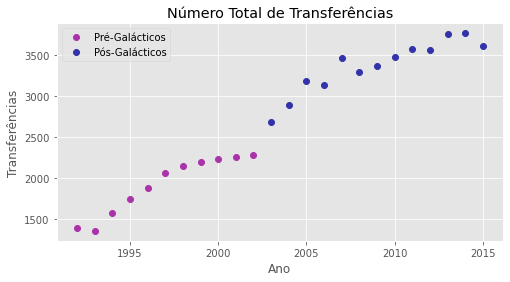

In [68]:
plt.figure(figsize = (8,4))
plt.plot(pre_gal, 'o', label = "Pré-Galácticos", color = "#AA33AA")
plt.plot(pos_gal, 'o', label = "Pós-Galácticos", color = "#3333AA")
plt.title("Número Total de Transferências")
plt.xlabel("Ano")
plt.ylabel("Transferências")
plt.legend(loc="upper left")
plt.show()

In [268]:
in_names = list(data_in["club_name"].value_counts().index)
out_names = list(data_in["club_involved_name"].value_counts().index)
name_dic = {}
problems = ["Olympique Marseille", "Olympique Lyon", "Eintracht Braunschweig", "Eintracht Frankfurt"]
for in_str in in_names:
    for out_str in out_names:

        if out_str[:10] in in_str and out_str != in_str:
            if (out_str not in problems) or (in_str not in problems):
                print(in_str ,", ", out_str)
                name_dic[out_str] = in_str

In [267]:
for k,v in name_dic.items():
    data_in["club_involved_name"].replace({k: v}, inplace=True)
    
data_in

,index,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season
0,0,Roda JC Kerkrade,Wiljan Pluim,22.0,Attacking Midfield,Vitesse Arnhem,£315Th.,in,Summer,0.315,Eredivisie,2011,2011/2012
1,1,Roda JC Kerkrade,Mitchell Donald,22.0,Central Midfield,Ajax Amsterdam,Free transfer,in,Summer,0.000,Eredivisie,2011,2011/2012
2,2,Roda JC Kerkrade,Martijn Monteyne,26.0,Right-Back,Beerschot AC,Free transfer,in,Summer,0.000,Eredivisie,2011,2011/2012
3,3,Roda JC Kerkrade,Davy De Beule,29.0,Right Midfield,KV Kortrijk,Free transfer,in,Summer,0.000,Eredivisie,2011,2011/2012
4,4,Roda JC Kerkrade,Mark-Jan Fledderus,28.0,Left-Back,Heracles Almelo,Free transfer,in,Summer,0.000,Eredivisie,2011,2011/2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18294,709,Sporting Gijón,Ognjen Vranjes,26.0,Centre-Back,Gaziantepspor,Free transfer,in,Winter,0.000,Primera Division,2015,2015/2016
18295,710,Sporting Gijón,Igor Lichnovsky,21.0,Centre-Back,FC Porto B,Loan,in,Winter,0.000,Primera Division,2015,2015/2016
18296,714,Real Betis Balompié,Leandro Damião,26.0,Centre-Forward,Santos FC,Loan,in,Winter,0.000,Primera Division,2015,2015/2016
18297,715,Real Betis Balompié,Charly Musonda Jr.,19.0,Attacking Midfield,Chelsea U21,Loan,in,Winter,0.000,Primera Division,2015,2015/2016


In [269]:
data_in["year"].value_counts()

2014    3771
2013    3766
2015    3621
2011    3573
2012    3568
Name: year, dtype: int64